<a href="https://colab.research.google.com/github/diegotluz/-10daysofMLChallenge/blob/master/Copy_of_CloudCognitive_RandomForest_Parcial_Enem_9DTS_Feito_em_grupo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sobre

### Nosso objetivo é criar um modelo de Machine Learning Simples utilizando Scikit-Learning que tenta “adivinhar” a nota dos candidatos em matemática (NU_NOTA_MT).


- Como variável de entrada, utilizaremos as colunas do questionário sócio econômico, acrescridas de cor/raça, tipo de escola, estado da prova e estado civil. Ou seja, utilize as colunas:  
NU_ANO, Q001, Q002, Q003, Q004, Q005, Q006, Q007, Q008, Q009, Q010, Q011, Q012, Q013, Q014, Q015, Q016, Q017, Q018, Q019, Q020, Q021, Q022, Q023, Q024, Q025, Q026, Q027, TP_ESTADO_CIVIL, TP_COR_RACA, TP_ESCOLA, CO_UF_PROVA.

---
## Sobre o modelo de ML
Para nossa abordagem, vamos criar N modelos de ML com Random Forest, e gerar uma Floresta final com todas as árvores



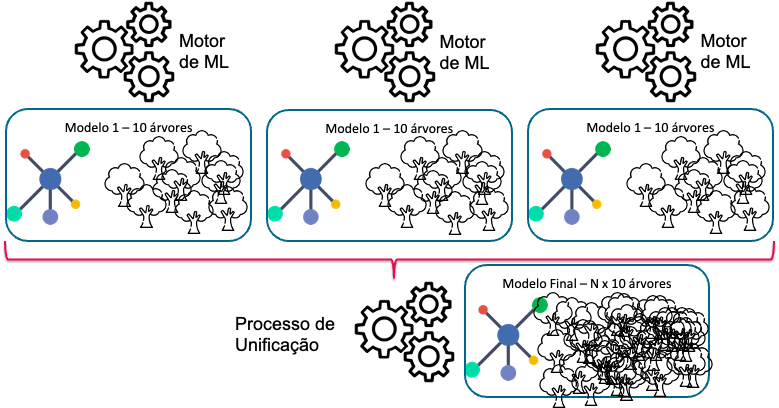

# Atividade

Gere 12 florestas (modelos do tipo Random Forest Regressor) para um décimo dos dados disponíveis na base de treino
- Cada floresta só pode possuir 10 árvores;
- Cada floresta só pode usar a parte dos dados disponíveis que lhe é atribuída;
- Discuta com a turma alternativas para essa divisão;


Gere uma nova floresta com as árvores das florestas anteriores
- Você precisa pesquisar o código para fazer esse merge


Obtenha uma fração dos dados de teste e:
- Faça uma predição usando a floresta resultando com as 120 árvores;
- Faça uma predição usando uma floresta qualquer que você gerou;
- Calcule o Root Mean Square Error das duas florestas e avalie essa métrica nos dois casos


# Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
from google.cloud import bigquery
from google.oauth2 import service_account
from sklearn.ensemble import RandomForestRegressor

# Autenticação do Colab com o Bigquery

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
#@title Preenchimento do código do projeto
#@markdown Preencha abaixo o código do teu projeto na GCP. <br/>
#@markdown Após preenchimento do código, execute essa célula.   <br/>

project_id = "fiap9dts"  #@param {type: "string"}
#@markdown ---
clientbq = bigquery.Client(project=project_id)


A célula a seguir testa a conexão do Big Query, listando todos os datasets disponíveis.

In [ ]:
for dataset in clientbq.list_datasets():
  print(dataset.dataset_id)

enem


# Treinamento de modelos Random Forest Regressor





In [ ]:
#@title Parâmetros
#@markdown Preencha com os parâmetros ncessários. <br/>
#@markdown Após preenchimento do código, execute essa célula.   <br/>

#@markdown Número de florestas desejadas:
n_florestas = 12 # @param {"type":"slider","min":1,"max":20,"step":1}
#@markdown Número de árvores por floresta:
n_arvores_modelo = 10 # @param {"type":"slider","min":1,"max":100,"step":1}
#@markdown O máximo de registros deve ser de acordo com a memória do computador, mas é interessante iniciar os testes com um valor menor:
n_maximo_registros = 10000 # @param {"type":"number"}
#@markdown ---
clientbq = bigquery.Client(project=project_id)

Features constantes.
Coloque aqui a declaração das features, pois as mesmas serão iguais em todas as árvores.

In [ ]:
features_entrada = ['NU_ANO', 'Q001','Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025', 'Q026', 'Q027', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_ESCOLA', 'CO_UF_PROVA']
feature_saida = 'NU_NOTA_MT'

## Dados de Treinamento
Antes de prosseguir', 'exiba uma amostra dos dados


In [ ]:
%%time
query_sql = f"""
  SELECT *
  FROM enem.ml_treino
  LIMIT 100
"""
query_job = clientbq.query(query_sql)  # Make an API request.
enem_dados = query_job.to_dataframe()
display(enem_dados)

,NU_ANO,NU_INSCRICAO,NU_NOTA_MT,Q001,Q002,Q003,Q004,Q005,Q006,Q007,...,Q022,Q023,Q024,Q025,Q026,Q027,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ESCOLA,CO_UF_PROVA
0,2020,200004304663,544.7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,3,1,21
1,2020,200004245266,398.8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,2,1,53
2,2020,200002231171,421.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,35
3,2020,200001471708,439.8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,3,1,25
4,2020,200001114370,572.9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,1,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2019,190001406613,448.4,8,8,1,6,8,1,1,...,3,1,1,1,0,0,1,3,2,28
96,2020,200004760705,372.9,5,4,3,6,3,1,1,...,4,1,1,2,0,0,1,3,1,15
97,2019,190005638148,405.7,5,5,2,2,3,1,1,...,2,1,1,1,0,0,1,2,1,29
98,2019,190005234863,386.4,2,3,1,1,5,1,1,...,1,1,1,1,0,0,0,5,1,50


CPU times: user 135 ms, sys: 12.5 ms, total: 148 ms
Wall time: 2.04 s


## Treinamento Paralelo

Insira os códigos necessários para gerar as florestas. Considere que o código poderia gerar florestas em computadores distintos.

In [ ]:
modelos = []
for n in range(n_florestas):
  print(n)
  query_sql = f"""
  SELECT *
  FROM enem.ml_treino
  WHERE MOD( NU_INSCRICAO, {n_florestas}) = {n}
  LIMIT {n_maximo_registros}
"""
  query_job = clientbq.query(query_sql)  # Make an API request.
  enem_dados = query_job.to_dataframe()
  print(enem_dados.shape)

  rf = RandomForestRegressor(n_estimators=n_arvores_modelo, random_state=42)
  rf.fit(enem_dados[features_entrada], enem_dados[feature_saida])

  modelos.append(rf)

0
(10000, 34)
1
(10000, 34)
2
(10000, 34)
3
(10000, 34)
4
(10000, 34)
5
(10000, 34)
6
(10000, 34)
7
(10000, 34)
8
(10000, 34)
9
(10000, 34)
10
(10000, 34)
11
(10000, 34)


# Combinação das Florestas

Insira os códigos necessários para combinar as florestas.

In [ ]:
modelo_resultante = RandomForestRegressor(n_estimators=n_florestas*n_arvores_modelo, random_state=42)
for i, modelo in enumerate(modelos):
  print(i, modelo)

  if i == 0:
    modelo_resultante.n_features_in_ = modelo.n_features_in_
    modelo_resultante.n_outputs_ = modelo.n_outputs_
    modelo_resultante.feature_names_in_ = modelo.feature_names_in_
    modelo_resultante.estimators_ = modelo.estimators_
  else:
    modelo_resultante.estimators_ = modelo_resultante.estimators_ + modelo.estimators_



0 RandomForestRegressor(n_estimators=10, random_state=42)
1 RandomForestRegressor(n_estimators=10, random_state=42)
2 RandomForestRegressor(n_estimators=10, random_state=42)
3 RandomForestRegressor(n_estimators=10, random_state=42)
4 RandomForestRegressor(n_estimators=10, random_state=42)
5 RandomForestRegressor(n_estimators=10, random_state=42)
6 RandomForestRegressor(n_estimators=10, random_state=42)
7 RandomForestRegressor(n_estimators=10, random_state=42)
8 RandomForestRegressor(n_estimators=10, random_state=42)
9 RandomForestRegressor(n_estimators=10, random_state=42)
10 RandomForestRegressor(n_estimators=10, random_state=42)
11 RandomForestRegressor(n_estimators=10, random_state=42)


# Teste / Validação

Obtenha uma amostra de dados de teste

In [ ]:
query_sql = f"""
SELECT *
FROM enem.ml_teste
LIMIT {n_maximo_registros}
"""
query_job = clientbq.query(query_sql)  # Make an API request.
enem_dados_teste = query_job.to_dataframe()
print(enem_dados_teste.shape)

(10000, 34)


## Métricas
- Faça uma predição usando a floresta resultando com as 120 árvores;  
- Faça uma predição usando uma floresta qualquer que você gerou;  
- Calcule o Root Mean Square Error das duas florestas e avalie essa métrica nos dois casos


In [ ]:
predito = modelo_resultante.predict(enem_dados_teste[features_entrada])
predito

array([469.05      , 483.2175    , 591.6325    , ..., 580.77416667,
       586.75083333, 460.82583333])

In [ ]:
predito_floresta_7 = modelos[7].predict(enem_dados_teste[features_entrada])
predito_floresta_7

array([449.99, 455.48, 562.97, ..., 519.26, 624.73, 469.25])

In [ ]:
enem_dados_teste['predito'] = predito
enem_dados_teste['predito_floresta_7'] = predito_floresta_7
enem_dados_teste['erro'] = enem_dados_teste['NU_NOTA_MT'] - enem_dados_teste['predito']
enem_dados_teste

,NU_ANO,NU_INSCRICAO,NU_NOTA_MT,Q001,Q002,Q003,Q004,Q005,Q006,Q007,...,Q025,Q026,Q027,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ESCOLA,CO_UF_PROVA,predito,erro,predito_floresta_7
0,2020,200004617590,570.5,2,2,1,2,4,1,1,...,2,0,0,1,3,1,26,469.050000,101.450000,449.99
1,2019,190004970092,480.4,3,4,3,2,2,2,1,...,2,0,0,1,2,1,33,483.217500,-2.817500,455.48
2,2020,200001422695,640.0,6,6,4,4,3,2,1,...,2,0,0,1,1,3,43,591.632500,48.367500,562.97
3,2019,190002814591,469.1,3,4,1,3,5,2,1,...,2,0,0,1,2,2,31,477.832500,-8.732500,432.33
4,2020,200004531392,658.1,5,5,2,2,4,2,1,...,2,0,0,1,4,1,23,499.597500,158.502500,437.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2018,180011451993,478.1,2,4,2,1,4,2,1,...,1,3,1,0,3,1,15,477.370833,0.729167,454.33
9996,2018,180007299984,522.5,5,5,3,4,3,2,1,...,2,3,2,0,3,1,27,528.629167,-6.129167,528.34
9997,2018,180013269392,544.4,4,5,1,2,4,4,4,...,2,3,4,0,3,1,52,580.774167,-36.374167,519.26
9998,2018,180008804584,677.9,6,7,4,4,4,12,1,...,2,3,2,0,2,1,31,586.750833,91.149167,624.73


In [ ]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error
root_mean_squared_error(enem_dados_teste['NU_NOTA_MT'], enem_dados_teste['predito'])

93.51866214646218

In [ ]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error
root_mean_squared_error(enem_dados_teste['NU_NOTA_MT'], enem_dados_teste['predito_floresta_7'])

100.15675671808629

In [ ]:
# prompt: exiba graficamente a arvore 45 do modelo modelo_resultante

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot da árvore 45 do modelo resultante
plt.figure(figsize=(20,10))
plot_tree(modelo_resultante.estimators_[44], feature_names=features_entrada, filled=True, rounded=True)
plt.show()


NameError: name 'modelo_resultante' is not defined

<Figure size 2000x1000 with 0 Axes>